In [2]:
import os
import cv2
import pandas as pd
import numpy as np
from skimage.transform import resize
from skimage.io import imread
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

In [3]:
datadir = "E:/desktop/master_assign/ece9039/project/garbage_classification/"

categories = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']

In [4]:
flat_data_arr = []
target_arr = []

In [5]:
# Loop through each subdirectory in the image directory
for i in categories:
    print(f'loading... category : {i}')
    path = os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized=resize(img_array,(224,224,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : battery
loaded category:battery successfully
loading... category : biological
loaded category:biological successfully
loading... category : brown-glass
loaded category:brown-glass successfully
loading... category : cardboard
loaded category:cardboard successfully
loading... category : clothes
loaded category:clothes successfully
loading... category : green-glass
loaded category:green-glass successfully
loading... category : metal
loaded category:metal successfully
loading... category : paper
loaded category:paper successfully
loading... category : plastic
loaded category:plastic successfully
loading... category : shoes
loaded category:shoes successfully
loading... category : trash
loaded category:trash successfully
loading... category : white-glass
loaded category:white-glass successfully


In [6]:
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

In [7]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
0,0.807843,0.780392,0.741176,0.807843,0.780392,0.741176,0.807843,0.780392,0.741176,0.807843,...,0.650980,0.717503,0.690052,0.650836,0.715052,0.687601,0.648385,0.713725,0.686275,0.647059
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.656445,0.621151,0.601544,0.644721,0.609427,0.589820,0.654779,0.619485,0.599877,0.685083,...,0.378034,0.367431,0.374436,0.385442,0.385968,0.386685,0.386326,0.355541,0.356258,0.355900
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [10]:
# Create a KNN classifier and fit the training data
from sklearn.metrics import accuracy_score
K_values = [1,2,3,4,5,6,7,8,9,10,11,12]
accuracy = []
best_k = None
best_score = 0
for k in K_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    accuracy = np.append(accuracy, score)
    if score > best_score:
        best_score = score
        best_k = k
        
print("Best k value:", best_k)

Best k value: 1


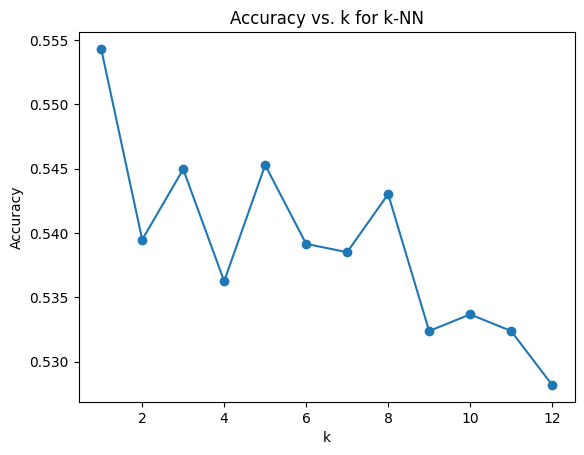

In [11]:
import matplotlib.pyplot as plt
plt.plot(K_values, accuracy, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for k-NN')
plt.show()

In [12]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Test accuracy:', score)

Test accuracy: 0.5543022881082823


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.46      0.59       194
           1       0.41      0.11      0.17       181
           2       0.56      0.25      0.35       130
           3       0.29      0.63      0.40       174
           4       0.76      0.83      0.79      1087
           5       0.62      0.43      0.51       131
           6       0.36      0.21      0.27       168
           7       0.60      0.29      0.39       206
           8       0.31      0.46      0.37       180
           9       0.61      0.40      0.48       381
          10       0.49      0.75      0.59       126
          11       0.27      0.59      0.37       145

    accuracy                           0.55      3103
   macro avg       0.51      0.45      0.44      3103
weighted avg       0.59      0.55      0.55      3103



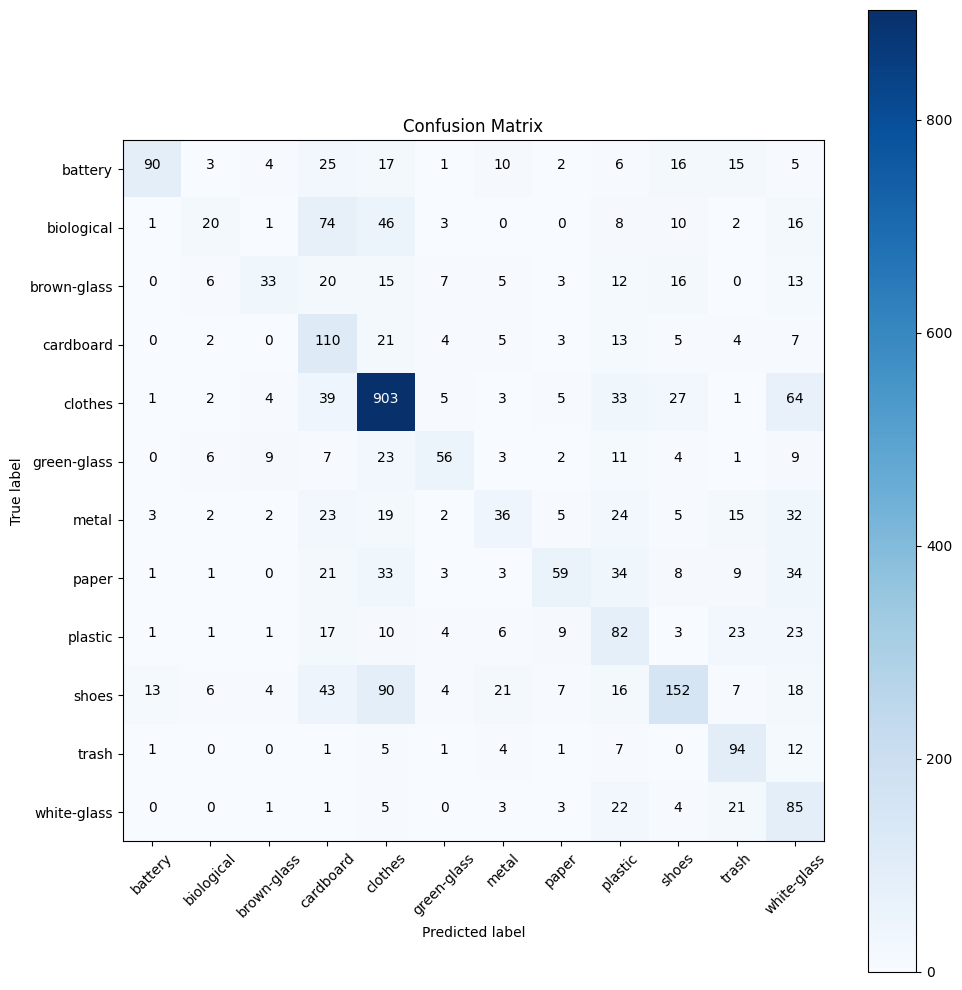

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, categories, normalize=False, title='Confusion Matrix')

# Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred))

In [28]:
from sklearn.ensemble import RandomForestClassifier

myRandomForest = RandomForestClassifier(n_estimators=10)
myRandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [30]:
RF_y_pred = myRandomForest.predict(X_test)
score_RF = accuracy_score(y_test, RF_y_pred)
print('Test accuracy:', score_RF)

Test accuracy: 0.603931679020303


Classification Report
              precision    recall  f1-score   support

           0       0.53      0.59      0.56       194
           1       0.44      0.37      0.40       181
           2       0.49      0.38      0.43       130
           3       0.54      0.49      0.52       174
           4       0.73      0.94      0.82      1087
           5       0.61      0.39      0.47       131
           6       0.36      0.23      0.28       168
           7       0.57      0.47      0.51       206
           8       0.51      0.36      0.42       180
           9       0.46      0.41      0.43       381
          10       0.53      0.56      0.55       126
          11       0.49      0.37      0.42       145

    accuracy                           0.60      3103
   macro avg       0.52      0.46      0.48      3103
weighted avg       0.58      0.60      0.58      3103



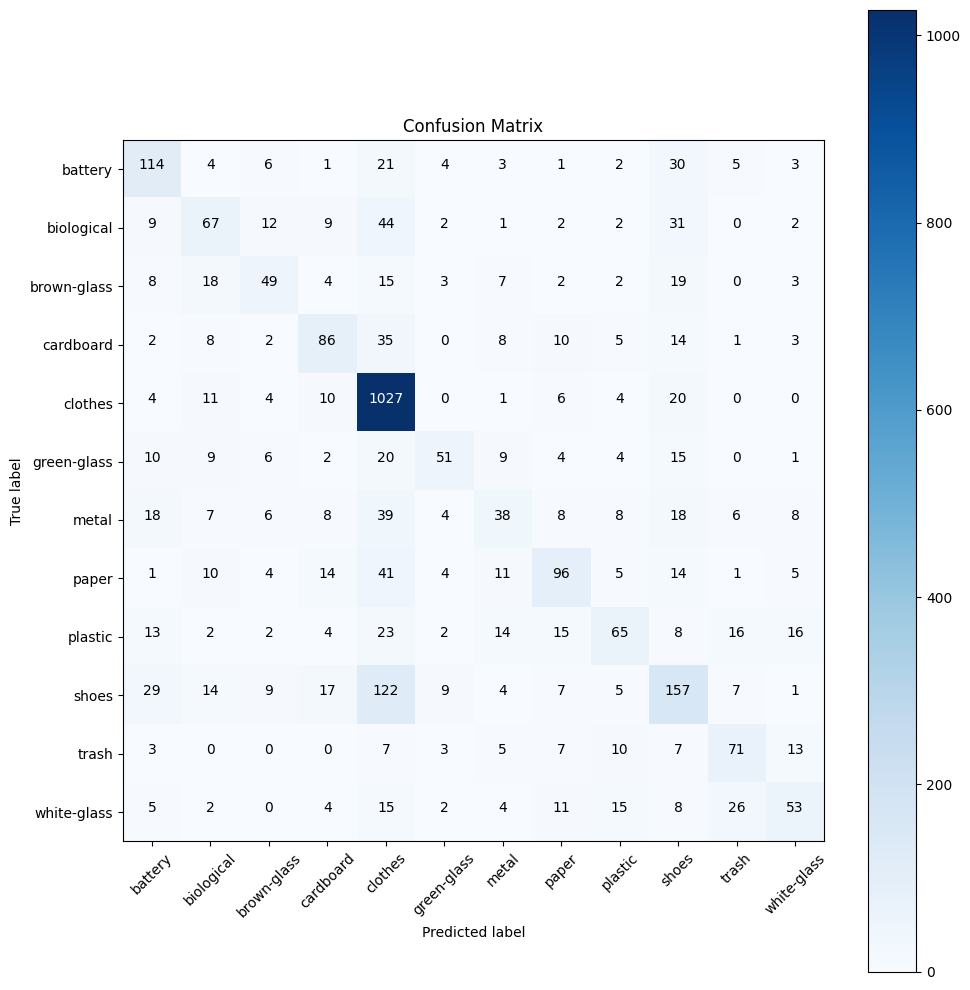

In [31]:
# Confusion Matrix
cm_RF = confusion_matrix(y_test, RF_y_pred)
plot_confusion_matrix(cm_RF, categories, normalize=False, title='Confusion Matrix')

# Classification Report
print('Classification Report')
print(classification_report(y_test, RF_y_pred))